In [1]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import to_categorical

In [2]:
#Loading Images along with Their Labels
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label)) 
    return images, labels

#A function to Display Grid of 8 Images from images Array
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

In [3]:
#Create Empty DataFrames
x_data=[]
y_data=[]

In [4]:
#Loading Sport Class Labels 
Sports_Labels=os.listdir('../data')
Sports_Labels

['badminton', 'cricket', 'football']

badminton images Added to Dataframe


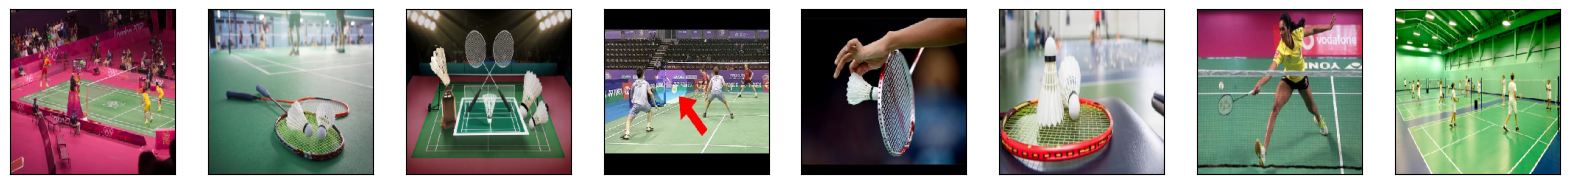

In [5]:
images, labels = load_images_from_path('../data/badminton', 0)
show_images(images)    
x_data += images
y_data += labels
print(Sports_Labels[0]+ " images Added to Dataframe")

cricket images Added to Dataframe


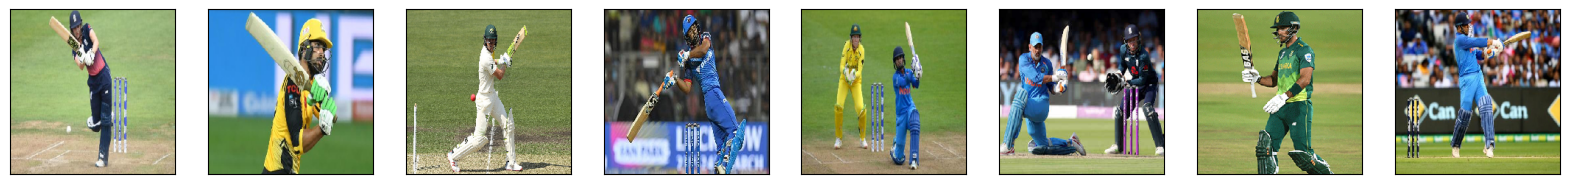

In [6]:
images, labels = load_images_from_path('../data/cricket', 1)
show_images(images)  
x_data += images
y_data += labels
print(Sports_Labels[1]+ " images Added to Dataframe")

football images Added to Dataframe


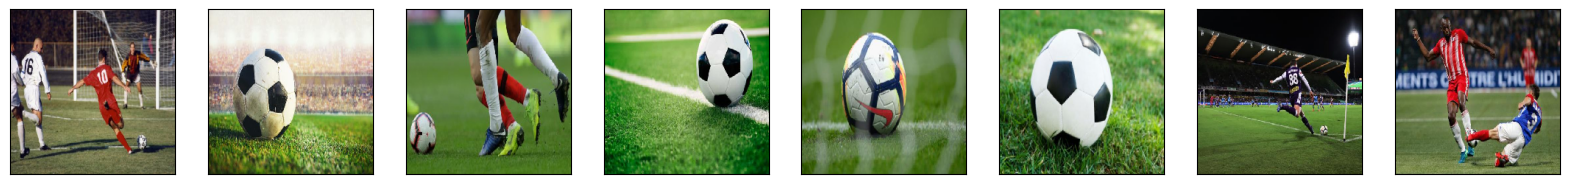

In [7]:
images, labels = load_images_from_path('../data/football', 2)
show_images(images)
x_data += images
y_data += labels
print(Sports_Labels[2]+ " images Added to Dataframe")

In [8]:
import os
from PIL import Image

def remove_unopenable_images(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            # Try to open the image
            with Image.open(file_path) as img:
                img.verify()  # Verify that it is, in fact, an image
        except (IOError, SyntaxError) as e:
            print(f"Removing unopenable image: {file_path}")
            os.remove(file_path)  # Remove the file if it can't be opened



In [9]:

# folder_path = '../data/football'  # Replace with your folder path
# remove_unopenable_images(folder_path)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Split the DataFrame into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [11]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [12]:
y_train_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], shape=(1960, 3))

In [13]:
x_train.shape

(1960, 224, 224, 3)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

In [15]:


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,211,523 (73.29 MB)

 Trainable params: 19,211,523 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
hist = model.fit(x_train, y_train_encoded, validation_data=(x_test, y_test_encoded), batch_size=10, epochs=15)

Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 731ms/step - accuracy: 0.3597 - loss: 1.1646 - val_accuracy: 0.3951 - val_loss: 1.1224
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 148s 754ms/step - accuracy: 0.5337 - loss: 0.9437 - val_accuracy: 0.5947 - val_loss: 0.9809
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 138s 705ms/step - accuracy: 0.6837 - loss: 0.7730 - val_accuracy: 0.7413 - val_loss: 0.6566
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 134s 686ms/step - accuracy: 0.7260 - loss: 0.6840 - val_accuracy: 0.6925 - val_loss: 0.7139
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 128s 653ms/step - accuracy: 0.7531 - loss: 0.6165 - val_accuracy: 0.7006 - val_loss: 0.7661
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 127s 646ms/step - accuracy: 0.7791 - loss: 0.5600 - val_accuracy: 0.7536 - val_loss: 0.6428
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 129s 656ms/step - accuracy: 0.8296 - loss: 0.4644 - val_accuracy: 0.7637 - val_loss: 0.6205
Epoch 8/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 669ms/step - accuracy: 0.8291 -

In [18]:
loss, accuracy = model.evaluate(x_test , y_test_encoded)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - accuracy: 0.7495 - loss: 1.2232
Test Loss: 1.223156452178955, Test Accuracy: 0.7494908571243286


In [ ]:
output_model = r"../Model/SportsClassificationModel.keras"
os.makedirs(os.path.dirname(output_model), exist_ok=True)


# Save the model
try:
    model.save(output_model)
    print(f"Model saved successfully at: {output_model}")
except Exception as e:
    print(f"Error saving model: {e}")


Model saved successfully at: ../Model/SportsClassificationModel.keras


In [ ]:
model = load_model(r"..\Model\SportsClassificationModel.keras")
loss, accuracy = model.evaluate(x_test , y_test_encoded)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.7495 - loss: 1.2232
Test Loss: 1.223156452178955, Test Accuracy: 0.7494908571243286


In [21]:
x_test.shape

(491, 224, 224, 3)

In [22]:
y_pridict=model.predict(x_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step


Actaual  Class  : badminton
Predicted Class : badminton


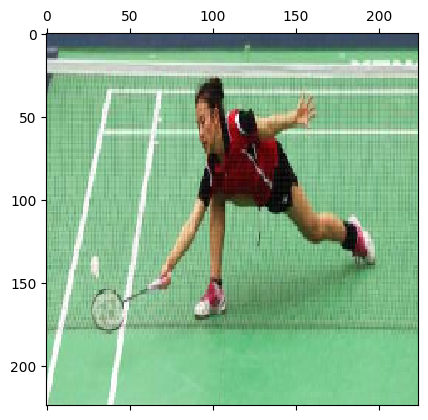

In [23]:
index=140
plt.matshow(x_test[index])
print("Actaual  Class  :",Sports_Labels[y_test[index]])
print("Predicted Class :",Sports_Labels[np.argmax(y_pridict[index])])

In [24]:
y_pridict_label=[ np.argmax(i) for i in y_pridict ]
cm=tf.math.confusion_matrix(labels= y_test ,predictions=y_pridict_label)

Text(33.22222222222222, 0.5, 'Truth')

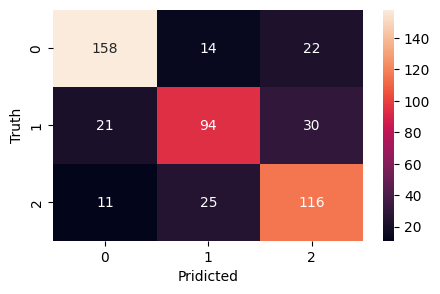

In [25]:
import seaborn as sb
plt.figure(figsize=(5,3))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Pridicted")
plt.ylabel("Truth")